In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [3]:
df = pd.read_csv("../input/bigmart/bigmart.csv")

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.shape

(8523, 12)

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [8]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [9]:
df['Outlet_age'] = 2018 - df['Outlet_Establishment_Year']

In [10]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31


In [11]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,20.168133
std,4.643456,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,9.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,14.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,19.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,31.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,33.000000


In [13]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
df['Outlet_Size'].mode()[0]

'Medium'

In [15]:
## fillna values of the Outlet_Size column with the mode 

df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [16]:
## Fill Na values of Item_weight column with the mean value of the column
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

<AxesSubplot:>

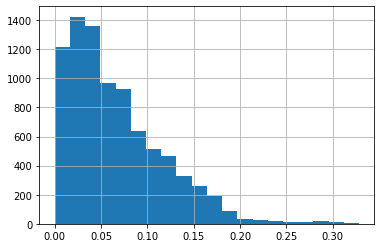

In [17]:
df['Item_Visibility'].hist(bins=20)

In [18]:
Q1 = df['Item_Visibility'].quantile(0.25)
Q3 = df['Item_Visibility'].quantile(0.75)
IQR = Q3-Q1
filt_df = df.query("(@Q1 - 1.5*@IQR)<= Item_Visibility <=(@Q3 + 1.5*@IQR)")

In [19]:
filt_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31


In [20]:
filt_df.shape,df.shape

((8379, 13), (8523, 13))

In [21]:
train = filt_df
train.shape

(8379, 13)

In [22]:
train['Item_Visibility_bins']=pd.cut(train['Item_Visibility'],[0.000,0.065,0.13,0.2],labels=['Low wiz','wiz','High wiz'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
train['Item_Visibility_bins'].value_counts()

Low wiz     4403
wiz         2557
High wiz     893
Name: Item_Visibility_bins, dtype: int64

In [24]:
train['Item_Visibility_bins'] = train['Item_Visibility_bins'].replace(np.nan,'Low wiz',regex=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace(['Low fat','LF'],'Low Fat')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('reg','Regular')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19,Low wiz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9,Low wiz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19,Low wiz
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,20,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31,NaN


In [28]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat'], dtype=object)

In [29]:
le = LabelEncoder()

In [30]:
train['Item_Fat_Content']=le.fit_transform(train['Item_Fat_Content'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
train['Item_Visibility_bins']=le.fit_transform(train['Item_Visibility_bins'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
train['Outlet_Size']=le.fit_transform(train['Outlet_Size'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
train['Outlet_Location_Type']=le.fit_transform(train['Outlet_Location_Type'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
dummy = pd.get_dummies(train['Outlet_Type'])

In [35]:
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [36]:
train = pd.concat([train,dummy],axis = 1)

In [37]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_age                     int64
Item_Visibility_bins           int64
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [38]:
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Outlet_Establishment_Year'],axis=1)

In [39]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_age', 'Item_Visibility_bins', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [40]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,19,1,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,9,1,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,19,1,0,1,0,0
3,19.20,1,0.000000,182.0950,3,2,732.3800,20,3,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,31,3,0,1,0,0


In [41]:
X = train.drop('Item_Outlet_Sales',axis=1)
y=train.Item_Outlet_Sales

In [42]:
test = pd.read_csv('../input/bigmart/bigmart.csv')

In [43]:
test['Outlet_Size']=test['Outlet_Size'].fillna('Medium')

In [44]:
test['Item_Visibility_bins']=pd.cut(test['Item_Visibility'],[0.000,0.065,0.13,0.2],labels=['Low wiz','wiz','High wiz'])

In [47]:
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [50]:
test['Item_Visibility_bins'] = test['Item_Visibility_bins'].fillna('Low wiz')

In [51]:
test['Item_Visibility_bins'].head()

0    Low wiz
1    Low wiz
2    Low wiz
3    Low wiz
4    Low wiz
Name: Item_Visibility_bins, dtype: category
Categories (3, object): ['Low wiz' < 'wiz' < 'High wiz']

In [52]:
le = LabelEncoder()

In [53]:
test['Item_Fat_Content']=le.fit_transform(test['Item_Fat_Content'])

In [54]:
test['Item_Visibility_bins']=le.fit_transform(test['Item_Visibility_bins'])

In [55]:
test['Outlet_Size']=le.fit_transform(test['Outlet_Size'])

In [56]:
test['Outlet_Location_Type']=le.fit(test['Outlet_Location_Type'])

In [57]:
test['Outlet_Age']=le.fit_transform(test["Outlet_Establishment_Year"])

In [58]:
dummy = pd.get_dummies(test['Outlet_Type'])

In [59]:
test = pd.concat([test,dummy],axis=1)

In [65]:
X_test = test.drop(['Item_Identifier','Item_Type','Outlet_Type','Outlet_Establishment_Year'],axis=1)

In [66]:
X.columns,X_test.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_age',
        'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
        'Item_Outlet_Sales', 'Item_Visibility_bins', 'Outlet_Age',
        'Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
        'Supermarket Type3'],
       dtype='object'))

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 1. Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lr = LinearRegression()

In [71]:
lr.fit(X_train,y_train)


LinearRegression()

In [72]:
print(lr.coef_)

[    3.08331322    19.31646415   -19.18527169    16.0500707
  -108.55246194    -8.52825716   -17.34191081    23.6175409
 -1592.13338148   195.14757673  -371.39526059  1768.38106534]


In [73]:
lr.intercept_

320.1883532189904

In [74]:
y_pred = lr.predict(X_test)

In [75]:
print(sqrt(mean_squared_error(y_test,y_pred)))

1113.9102228050256


## 2. Ridge Regression

In [86]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.001,normalize=True)

In [87]:
ridgereg.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(alpha=0.001, normalize=True)

In [88]:
print(ridgereg.coef_)

[    3.08285805    19.31005564   -20.8722418     16.03414605
  -107.23331125    -8.25424988   -17.07880015    23.65621761
 -1653.60215927   135.02089852  -427.7627292   1703.78904402]


In [89]:
ridgereg.intercept_

375.02156122663564

In [90]:
y_pred = ridgereg.predict(X_test)

In [94]:
print(sqrt(mean_squared_error(y_test,y_pred)))
print(sqrt(mean_squared_error(y_train,ridgereg.predict(X_train))))

1113.833921992322
1141.5712671562353


In [93]:
print("R2 Value = {}".format(ridgereg.score(X_test,y_test)))

R2 Value = 0.5485018630707434


## 3. Lasso

In [95]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha = 0.001,normalize=True)
lassoreg.fit(X_train,y_train)

print(sqrt(mean_squared_error(y_test,lassoreg.predict(X_test))))
print(sqrt(mean_squared_error(y_train,lassoreg.predict(X_train))))

print("R2 Score \Coefficient = {}".format(lassoreg.score(X_test,y_test)))

1113.9001023985004
1141.5704661827888
R2 Score \Coefficient = 0.548448208361191


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


## 4. ElasticNet

In [96]:
from sklearn.linear_model import ElasticNet
ENreg = ElasticNet(alpha = 0.001,normalize=True)
ENreg.fit(X_train,y_train)

print(sqrt(mean_squared_error(y_test,ENreg.predict(X_test))))
print(sqrt(mean_squared_error(y_train,ENreg.predict(X_train))))

print("R2 Score \Coefficient = {}".format(ENreg.score(X_test,y_test)))

1411.5665928520436
1472.673558169745
R2 Score \Coefficient = 0.2748667409064246


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,
